# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from sklearn.neighbors import KNeighborsClassifier

# Loading Dataset

In [3]:
data=pd.read_csv("Data.csv")
data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


footfall: The number of people or objects passing by the machine.

tempMode: The temperature mode or setting of the machine.

AQ: Air quality index near the machine.

USS: Ultrasonic sensor data, indicating proximity measurements.

CS: Current sensor readings, indicating the electrical current usage of the machine.

VOC: Volatile organic compounds level detected near the machine.

RP: Rotational position or RPM (revolutions per minute) of the machine parts.

IP: Input pressure to the machine.

Temperature: The operating temperature of the machine.

fail: Binary indicator of machine failure (1 for failure, 0 for no failure).

In [4]:
data.shape

(944, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [6]:
data.isna().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

In [7]:
data.duplicated().sum()


1

In [8]:
data.drop_duplicates()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [9]:
target=data['fail'].value_counts(sort=True)


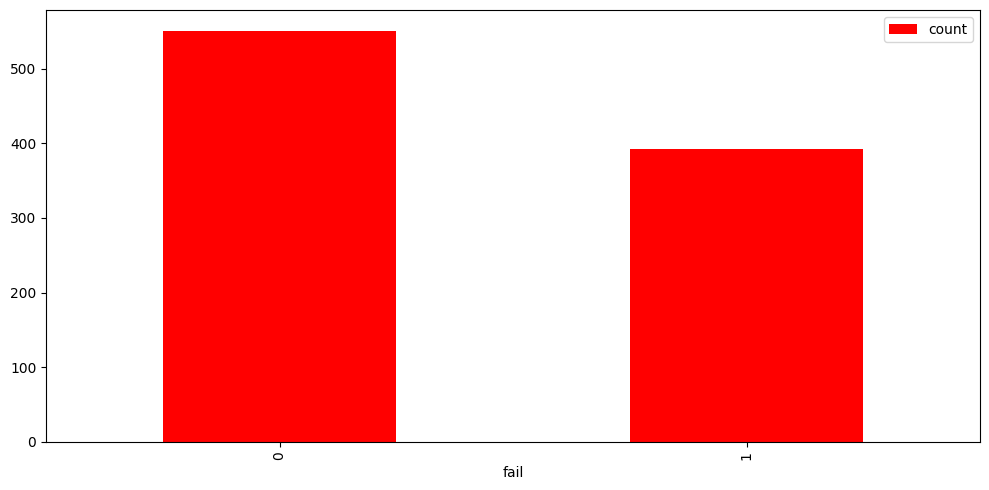

In [10]:
plt.figure(figsize=(10,5))
target.plot(kind='bar',color="red")
plt.legend()
plt.tight_layout()
plt.show()

<Axes: >

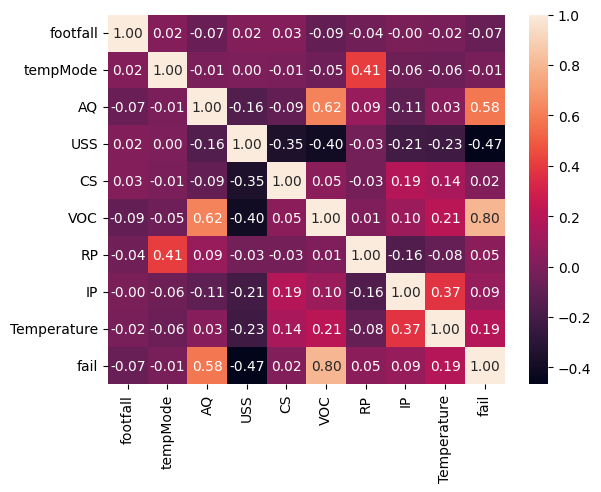

In [11]:
sns.heatmap(data.corr(),annot=True,fmt =".2f")

In [12]:
y=data.pop("fail")
x=data


In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
model=KNeighborsClassifier(n_neighbors=11)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [15]:
y_pred = model.predict(x_test)

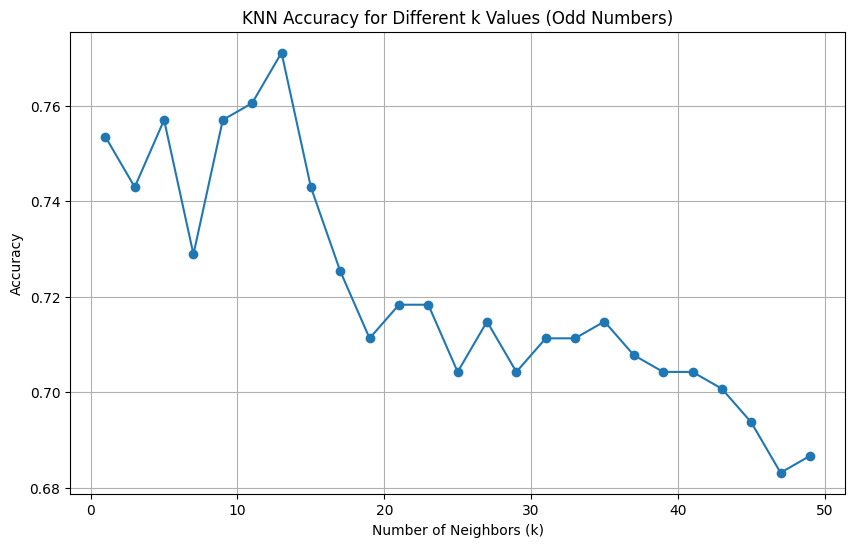

In [16]:
from sklearn.metrics import accuracy_score 
# List to store accuracies for different k values
accuracies = []

# Test KNN with k from 1 to 50
for k in range(1, 51, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51, 2), accuracies, marker='o', linestyle='-')
plt.title('KNN Accuracy for Different k Values (Odd Numbers)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [17]:
best_k = range(1, 51, 2)[np.argmax(accuracies)]
best_accuracy = max(accuracies)

In [18]:
# Train and evaluate the model with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_train, y_train)
best_y_pred = best_knn.predict(x_test)

# Print classification report and confusion matrix for the best k
print("Classification Report for the best k:")
print(classification_report(y_test, best_y_pred))
print("Confusion Matrix for the best k:")
print(confusion_matrix(y_test, best_y_pred))

Classification Report for the best k:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       160
           1       0.82      0.61      0.70       124

    accuracy                           0.77       284
   macro avg       0.78      0.75      0.76       284
weighted avg       0.78      0.77      0.76       284

Confusion Matrix for the best k:
[[143  17]
 [ 48  76]]
